In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from "derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr"
data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr',preload=True)
#data=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/derivatives/sub-xp109/eeg_pp/sub-xp109_task-eegfmriNF_eeg_pp.vhdr',preload=True)

Extracting parameters from C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr...
Setting channel info structure...


C:\Users\ernes\AppData\Local\Temp\ipykernel_24296\2832789702.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr',preload=True)


Reading 0 ... 80199  =      0.000 ...   400.995 secs...


C:\Users\ernes\AppData\Local\Temp\ipykernel_24296\2832789702.py:7: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-eegfmriNF_eeg_pp.vhdr',preload=True)


In [2]:
%matplotlib tk
#data.plot()
data.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2015-08-14 15:34:52 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [3]:
# ecg_evoked = mne.preprocessing.create_ecg_epochs(data, ch_name='ECG').average()
#ecg_evoked.apply_baseline(baseline=(None, -0.2)) #afegit
# ecg_evoked.plot_joint()

In [4]:
data_filt=data.copy().load_data().crop(tmin=30).filter(2.5,40)
#data_filt.plot()
data_filt.info

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.50
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (1.655 sec)



<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 2.5 Hz
 lowpass: 40.0 Hz
 meas_date: 2015-08-14 15:34:52 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [5]:
ica = mne.preprocessing.ICA(n_components=63, max_iter='auto', method='picard')
#other ICA methods with fit_params can be used
ica.fit(data_filt)
ica

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 63 components
Fitting ICA took 237.4s.


Method,picard
Fit,276 iterations on raw data (74200 samples)
ICA components,63
Explained variance,100.0 %
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


In [6]:
ica.plot_sources(data_filt)

Creating RawArray with float64 data, n_channels=63, n_times=74200
    Range : 6000 ... 80199 =     30.000 ...   400.995 secs
Ready.
Using qt as 2D backend.
Opening ica-browser...


In [7]:
ica.plot_components()
# to analyse our results https://labeling.ucsd.edu/tutorial/labels

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 585x260.5 with 3 Axes>]

In [8]:
ica.plot_properties(data_filt, picks=[2])
ica.plot_properties(data_filt, picks=[12])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
185 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
185 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 700x600 with 6 Axes>]

Applying ICA to Raw instance
    Transforming to ICA space (63 components)
    Zeroing out 2 ICA components
    Projecting back using 63 PCA components


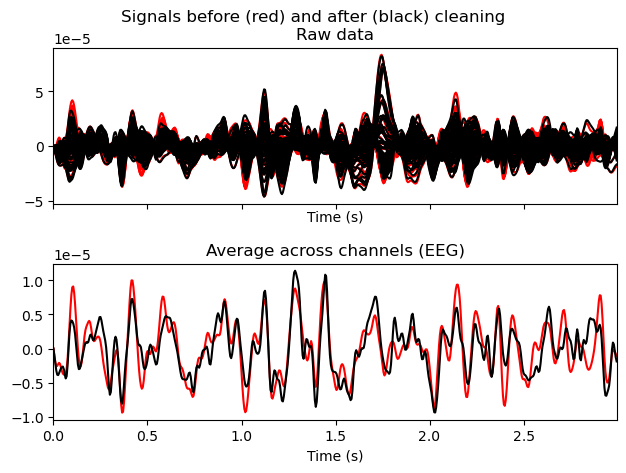

In [9]:
ica.plot_overlay(data_filt, exclude=[2,12])

In [10]:
# pick some channels that clearly show heartbeats and blinks
artifact_picks = mne.pick_channels(data_filt.ch_names, include=['Fp1','Fp2','AF3', 'AF4','AF7','AF8','Fpz'])
artifact_picks

array([ 0,  1, 38, 39, 52, 53, 62])

In [11]:
ica.exclude=[2,12]

In [12]:
reconst = data_filt.copy()
ica.apply(reconst)
data_filt.plot()
reconst.plot()

Applying ICA to Raw instance
    Transforming to ICA space (63 components)
    Zeroing out 2 ICA components
    Projecting back using 63 PCA components
Opening raw-browser...
Opening raw-browser...


In [13]:
for i in [20,22,24,26,34,40,42,48]:
    print(data.ch_names[i])
#names of the reference channels of the EEG used by the authors

FC1
CP1
FC5
CP5
C1
FC3
CP3
C5


In [13]:
events=mne.events_from_annotations(data_filt) #extract the events from the data
events 

Used Annotations descriptions: ['Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']


(array([[ 6189,     0, 10001],
        [ 6243,     0,  1128],
        [ 6389,     0, 10001],
        ...,
        [79843,     0,  1128],
        [79898,     0, 10001],
        [80099,     0, 10001]]),
 {'Pulse Artifact/R': 10001,
  'Response/R128': 1128,
  'Stimulus/S  2': 2,
  'Stimulus/S 99': 99,
  'TPULSE/TEND': 10002,
  'TPULSE/TPEAK': 10003,
  'TPULSE/TSTART': 10004})

In [58]:
task=events[0][events[0][:,2]==2] #task
task_time=task[:,0:1]/200 #divide the samples between sampling frequency (200 Hz) to obtain time in seconds
task_time

array([[ 60.115],
       [100.2  ],
       [140.29 ],
       [180.39 ],
       [220.48 ],
       [260.56 ],
       [300.675],
       [340.825],
       [380.925]])

In [59]:
rest=events[0][events[0][:,2]==99] #rest
rest_time=rest[:,0:1]/200 #divide the samples between sampling frequency (200 Hz) to obtain time in seconds
rest_time=np.append(rest_time,task_time[-1] + 20) #add the end value of the time series to have same length with task_time
rest_time

array([ 40.07 ,  80.17 , 120.24 , 160.355, 200.445, 240.53 , 280.615,
       320.75 , 360.86 , 400.925])

In [25]:
# time=np.concatenate((task_time,rest_time))
# time=np.squeeze(time)
# time=np.sort(time)
# time=np.append(time,time[-1] + 20) #add the end value of the time series summing 20 seconds
# time

In [14]:
#Create a new channel called stimulation (STI) needed to add the events
stim=mne.create_info(['STI'],200,['stim'])
stim_raw=mne.io.RawArray(np.zeros([1,74200]),stim) #AUTOMATITZAR!
data_filt.load_data().add_channels([stim_raw],force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=74200
    Range : 0 ... 74199 =      0.000 ...   370.995 secs
Ready.


<RawBrainVision | sub-xp101_task-eegfmriNF_eeg_pp.dat, 65 x 74200 (371.0 s), ~36.9 MB, data loaded>

In [15]:
data_filt.add_events(events[0],stim_channel='STI',replace=True) #add the events to the data
# data_filt.ch_names #see the STI channel at the end

In [16]:
# ALTERNATIVA 1
event_id = {'task':2,'rest':99} #take the value of the 'Stimulus/S 10001': 10001
tmin = 7.5  # start of each epoch (200ms before the trigger)
tmax = 8.5  # end of each epoch (500ms after the trigger) 
data_filt.info['bads'] = ['ECG'] # ECG is a bad channel
baseline = (7.5,None) #typical (None,0)
# https://neuro.inf.unibe.ch/AlgorithmsNeuroscience/Tutorial_files/BaselineCorrection.html
# https://github.com/mne-tools/mne-python/issues/1792

In [17]:
reject_criteria = dict(eeg=600e-5)      
# picks = mne.pick_types(data_filt.info, meg=False, eeg=True, stim=False, misc=True,
#                        include=[])
picks = mne.pick_types(data_filt.info, meg=False, eeg=True, stim=False, misc=True,
                       include=[], exclude='bads')

In [18]:
epochs = mne.Epochs(data_filt, events[0], event_id, tmin, tmax, picks=picks, proj=False,
                    baseline=baseline, reject=reject_criteria)
epochs.plot()

Not setting metadata
18 matching events found
Setting baseline interval to [7.5, 8.5] sec
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 18 events and 201 original time points ...
0 bad epochs dropped
Opening epochs-browser...
Using data from preloaded Raw for 18 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original time points ...
Using data from preloaded Raw for 1 events and 201 original

In [19]:
epochs_task=epochs['task']
epochs_rest=epochs['rest']

Using data from preloaded Raw for 9 events and 201 original time points ...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


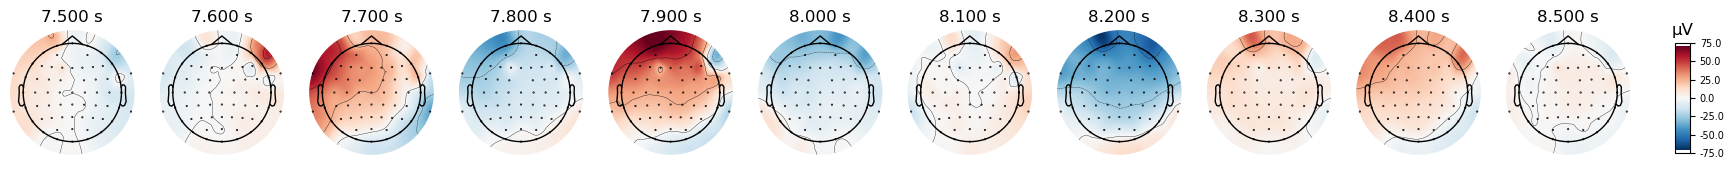

In [20]:
# "FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"
evoked_task = epochs_task.load_data().set_eeg_reference(ref_channels= ["TP9","TP10"]).average() #mean of the epochs to get the evoked response
evoked_task.plot(time_unit='s',gfp=True) #plot of the evoked response
evoked_task.plot_topomap(times=np.linspace(7.5,8.5,11), ch_type='eeg',time_unit='s') #topomap

Using data from preloaded Raw for 9 events and 201 original time points ...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


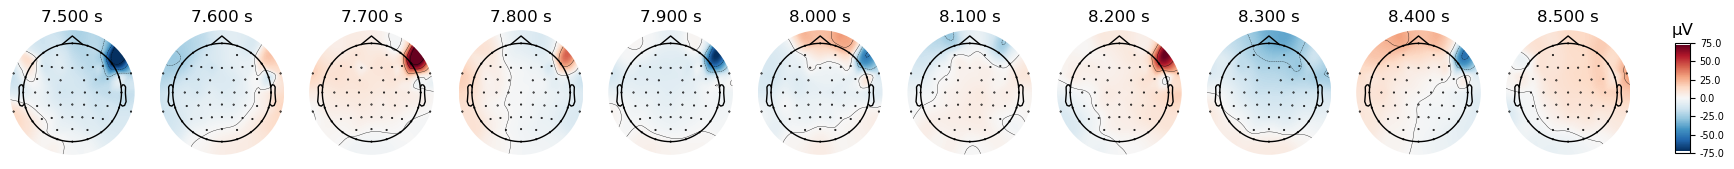

In [21]:
evoked_rest = epochs_rest.load_data().set_eeg_reference(ref_channels= ["TP9","TP10"]).average() #mean of the epochs to get the evoked response
evoked_rest.plot(time_unit='s',gfp=True) #plot of the evoked response
evoked_rest.plot_topomap(times=np.linspace(7.5,8.5,11), ch_type='eeg',time_unit='s') #topomap

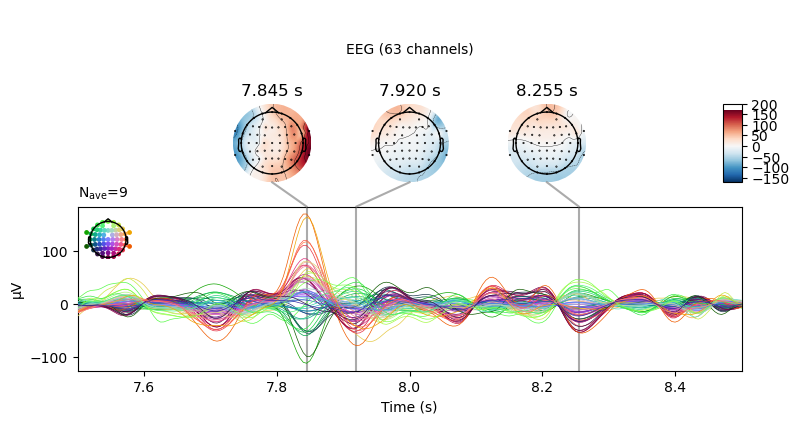

In [36]:
evoked_task.plot_joint()

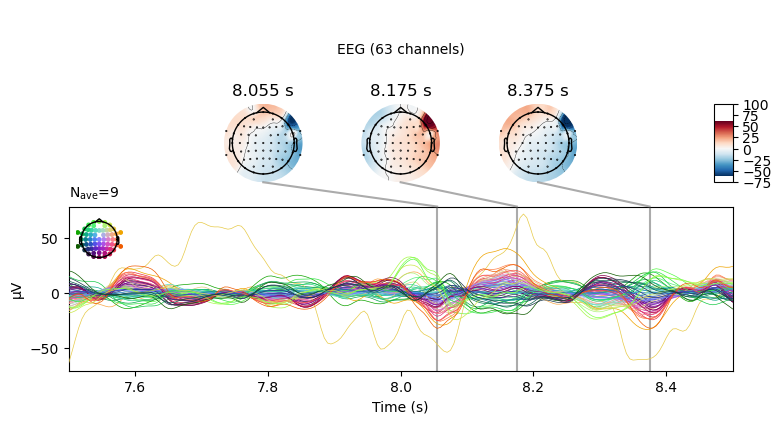

In [37]:
evoked_rest.plot_joint()

In [9]:
# ALTERNATIVA 2

epochs_list_task=[0 for i in range(0, len(task_time)-1)] #create a list of zeros for the task
epochs_list_rest=[0 for i in range(0, len(rest_time)-1)] #create a list of zeros for the rest

for j in range(len(task_time)-1):
    epochs_list_task[j]= mne.make_fixed_length_epochs(data_filt.copy().crop(tmin=round(float(task_time[j]),1), tmax=round(float(rest_time[j]),1)))

for k in range(len(rest_time)-1):
    epochs_list_rest[k]= mne.make_fixed_length_epochs(data_filt.copy().crop(tmin=round(float(rest_time[k]),1), tmax=round(float(task_time[k+1]),1)))
       
epochs_task=mne.concatenate_epochs(epochs_list_task)
epochs_rest=mne.concatenate_epochs(epochs_list_rest)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found


C:\Users\ernes\AppData\Local\Temp\ipykernel_25548\990757225.py:12: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_task=mne.concatenate_epochs(epochs_list_task)


Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using 

C:\Users\ernes\AppData\Local\Temp\ipykernel_25548\990757225.py:13: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_rest=mne.concatenate_epochs(epochs_list_rest)


In [11]:
epochs_task.plot()

Opening epochs-browser...


In [12]:
epochs_task.load_data().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).plot()

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Opening epochs-browser...


In [13]:
epochs_rest.plot()

Opening epochs-browser...


In [14]:
epochs_rest.load_data().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).plot()

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Opening epochs-browser...


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


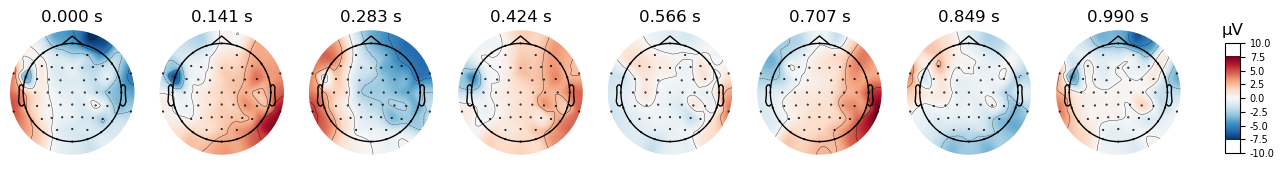

In [10]:
evoked_task = epochs_task.set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).average() #mean of the epochs to get the evoked response
evoked_task.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked_task.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


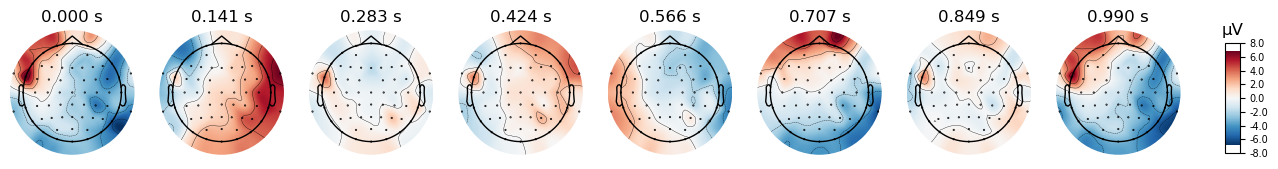

In [11]:
evoked_rest = epochs_rest.set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).average() #mean of the epochs to get the evoked response
evoked_rest.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked_rest.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')

No projector specified for this dataset. Please consider the method self.add_proj.


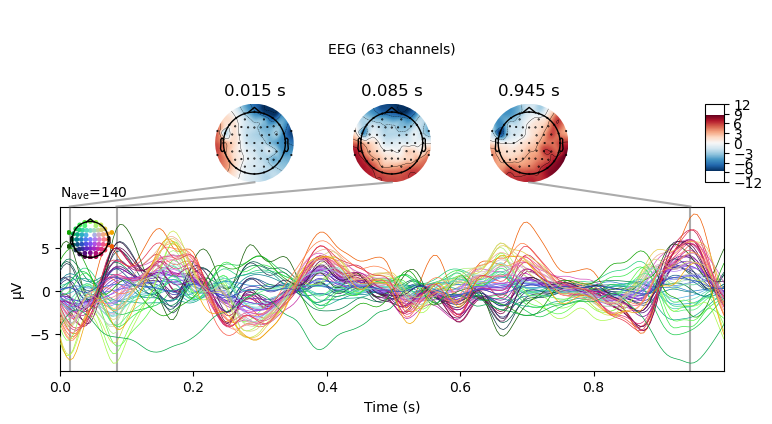

In [12]:
mne.viz.plot_evoked_joint(evoked_task)

No projector specified for this dataset. Please consider the method self.add_proj.


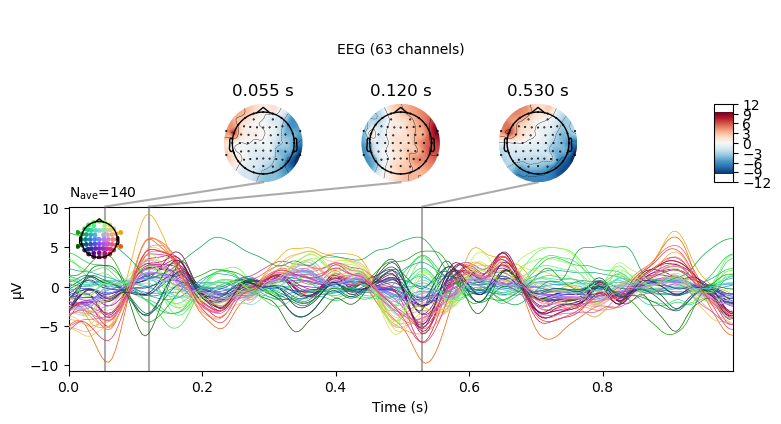

In [13]:
mne.viz.plot_evoked_joint(evoked_rest)

In [21]:
# https://mne.tools/stable/auto_examples/visualization/topo_compare_conditions.html
# Generate list of evoked objects from conditions names
evokeds = [evoked_task,evoked_rest]

# Show topography for different states
from mne.viz import plot_evoked_topo

colors = 'blue', 'red'
title = 'EEG data\ntask (blue) vs rest (red)'

plot_evoked_topo(evokeds, color=colors, title=title, background_color='w')

plt.show()

In [22]:
# Comparing evoked objects
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evokeds, picks='eeg', combine=combine)

combining channels using "mean"
combining channels using "mean"
combining channels using "median"
combining channels using "median"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "<function custom_func at 0x0000023B300F0CA0>"
combining channels using "<function custom_func at 0x0000023B300F0CA0>"


In [51]:
# https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html
# Using an infinite reference (REST)
data_filt.del_proj()  # remove our average reference projector first
sphere = mne.make_sphere_model('auto', 'auto', data_filt.info)
src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=5.) #5 mm as pos for a real data analysis
forward = mne.make_forward_solution(data_filt.info, trans=None, src=src, bem=sphere)
data_ref = data_filt.copy().set_eeg_reference('REST', forward=forward)

for title, _raw in zip(['Original', 'REST (∞)'], [data_filt, data_ref]):
    with mne.viz.use_browser_backend('matplotlib'):
        fig = data_filt.plot(n_channels=len(data_filt), scalings=dict(eeg=5e-5))
    # make room for title
    fig.subplots_adjust(top=0.9)
    fig.suptitle('{} reference'.format(title), size='xx-large', weight='bold')

In [52]:
data_ref.plot()

In [10]:
epochs_list_task=[0 for i in range(0, len(task_time)-1)] #create a list of zeros for the task
epochs_list_rest=[0 for i in range(0, len(rest_time)-1)] #create a list of zeros for the rest

for j in range(len(task_time)-1):
    epochs_list_task[j]= mne.make_fixed_length_epochs(data_ref.copy().crop(tmin=round(float(task_time[j]),1), tmax=round(float(rest_time[j]),1)))

for k in range(len(rest_time)-1):
    epochs_list_rest[k]= mne.make_fixed_length_epochs(data_ref.copy().crop(tmin=round(float(rest_time[k]),1), tmax=round(float(task_time[k+1]),1)))
       
epochs_task=mne.concatenate_epochs(epochs_list_task)
epochs_rest=mne.concatenate_epochs(epochs_list_rest)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found


C:\Users\ernes\AppData\Local\Temp\ipykernel_16508\219121174.py:10: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_task=mne.concatenate_epochs(epochs_list_task)
C:\Users\ernes\AppData\Local\Temp\ipykernel_16508\219121174.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_rest=mne.concatenate_epochs(epochs_list_rest)


0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Not setting metadata
140 matching events found
No baseline correction applied
0 bad epochs dropped


In [53]:
evoked_task = epochs_task.average() #mean of the epochs to get the evoked response
evoked_task.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked_task.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')

ValueError: Times should be between 0.5 and 3.0.

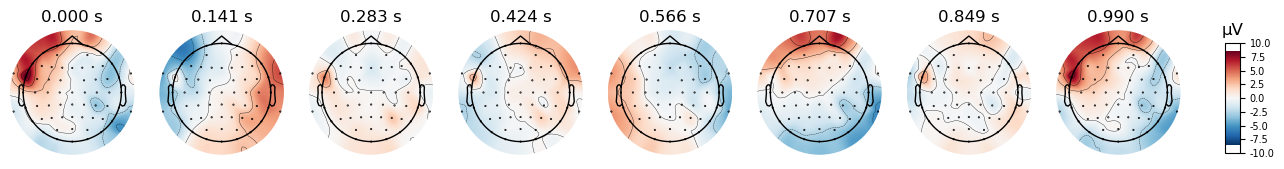

In [12]:
evoked_rest = epochs_rest.average() #mean of the epochs to get the evoked response
evoked_rest.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked_rest.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')